#Лабораторная работа № 3 Методы классификации.
Цель работы: Провести исследование набора данных о пассажирах Титаника, провести сравнение методов классификации по критериям точности классификации


Формат данных:

PassengerId - идентификатор пассажира

Survival - поле в котором указано спасся человек(1) или нет (0)

Pclass - содержит социально-экономический статус, "класс пассажира" (высокий, средний, низкий)

Name - имя пассажира

Sex - пол пассажира

Age - возраст

SibSp - содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)

Parch - содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)

Ticket - номер билета

Fare - цена билета

Cabin - каюта

Embarked - порт посадки (C - Cherbourg, Q - Queenstown, S - Southampton)

In [97]:
#импортируем библиотеки
import os
import sys
import random
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score

from matplotlib import pyplot as plt

In [2]:
#фиксируем  параметры генератора псевдослучайных чисел для воспроизводимости экспериментов
seed = 42
random.seed(seed)
np.random.seed(seed)

**ЗАГРУЗКА ДАННЫХ**

In [3]:
# Загрузка набора данных Титаник 
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [102]:
# Чтение набора данных Титаник в переменную passengers типа pandas.core.frame.DataFrame (тип для наборов данных)
passengers = pd.read_csv(r"C:\Users\nevil\Desktop\University\4 курс\BigData\5\titanik.csv", sep=',')
type(passengers)
 

pandas.core.frame.DataFrame

In [103]:
passengers.head(10)
#Смотрим на первые 10 записей в датасете

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [104]:
passengers.columns
#получаем список столбцов

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [105]:
passengers.shape
#Размерность датасета - 891 запись (строка), 12 столбцов

(891, 12)

**РАЗБИЕНИЕ И ПОДГОТОВКА ДАННЫХ**

In [106]:
#случайная выборка 80% данных для обучения
train_df = passengers.sample(frac=0.8, random_state=seed)

In [107]:
train_df.shape
#Размерность тренировочного датасета - 713 строк, 12 столбцов

(713, 12)

In [108]:
train_df.head(20)

PassengerId  Survived  Pclass  \
709          710         1       3   
439          440         0       2   
840          841         0       3   
720          721         1       2   
39            40         1       3   
290          291         1       1   
300          301         1       3   
333          334         0       3   
208          209         1       3   
136          137         1       1   
137          138         0       1   
696          697         0       3   
485          486         0       3   
244          245         0       3   
344          345         0       2   
853          854         1       1   
621          622         1       1   
653          654         1       3   
886          887         0       2   
110          111         0       1   

                                                  Name     Sex   Age  SibSp  \
709  Moubarek, Master. Halim Gonios ("William George")    male   NaN      1   
439             Kvillner, Mr. Johan Henrik Johannesson    male  31.0      0   
840                        Alhomaki, Mr. Ilmari Rudolf    male  20.0      0   
720                  Harper, Miss. Annie Jessie "Nina"  female   6.0      0   
39                         Nicola-Yarred, Miss. Jamila  female  14.0      1   
290                       Barber, Miss. Ellen "Nellie"  female  26.0      0   
300           Kelly, Miss. Anna Katherine "Annie Kate"  female   NaN      0   
333                    Vander Planke, Mr. Leo Edmondus    male  16.0      2   
208                          Carr, Miss. Helen "Ellen"  female  16.0      0   
136                       Newsom, Miss. Helen Monypeny  female  19.0      0   
137                        Futrelle, Mr. Jacques Heath    male  37.0      1   
696                                   Kelly, Mr. James    male  44.0      0   
485                             Lefebre, Miss. Jeannie  female   NaN      3   
244                               Attalah, Mr. Sleiman    male  30.0      0   
344                            Fox, Mr. Stanley Hubert    male  36.0      0   
853                          Lines, Miss. Mary Conover  female  16.0      0   
621                       Kimball, Mr. Edwin Nelson Jr    male  42.0      1   
653                      O'Leary, Miss. Hanora "Norah"  female   NaN      0   
886                              Montvila, Rev. Juozas    male  27.0      0   
110                     Porter, Mr. Walter Chamberlain    male  47.0      0   

     Parch            Ticket     Fare Cabin Embarked  
709      1              2661  15.2458   NaN        C  
439      0        C.A. 18723  10.5000   NaN        S  
840      0  SOTON/O2 3101287   7.9250   NaN        S  
720      1            248727  33.0000   NaN        S  
39       0              2651  11.2417   NaN        C  
290      0             19877  78.8500   NaN        S  
300      0              9234   7.7500   NaN        Q  
333      0            345764  18.0000   NaN        S  
208      0            367231   7.7500   NaN        Q  
136      2             11752  26.2833   D47        S  
137      0            113803  53.1000  C123        S  
696      0            363592   8.0500   NaN        S  
485      1              4133  25.4667   NaN        S  
244      0              2694   7.2250   NaN        C  
344      0            229236  13.0000   NaN        S  
853      1          PC 17592  39.4000   D28        S  
621      0             11753  52.5542   D19        S  
653      0            330919   7.8292   NaN        Q  
886      0            211536  13.0000   NaN        S  
110      0            110465  52.0000  C110        S

In [109]:
#выборка всех данных не входящих в обучение для теста
test_df = passengers[~passengers['PassengerId'].isin(train_df['PassengerId'])]

In [110]:
 test_df.shape
 #Размерность тестового датасета - 178 строк, 12 столбцов

(178, 12)

In [111]:
# Запись тренировочного и тестового множества в файлы сsv
train_df.to_csv('train_students.csv', index=False)
test_df.to_csv('test_students.csv', index=False)


**Подготовка данных для работы классификатора: 
замена категориальных(символьных) значений числовыми
и вставка пропущенных значений**



In [112]:
#Замена значений пола (male,female) на численные значения
train_df['Sex'].replace({'male':0, 'female':1}, inplace=True)
test_df['Sex'].replace({'male':0, 'female':1}, inplace=True)

In [113]:
train_df.head()
#Проверка замены значений пола

PassengerId  Survived  Pclass  \
709          710         1       3   
439          440         0       2   
840          841         0       3   
720          721         1       2   
39            40         1       3   

                                                  Name  Sex   Age  SibSp  \
709  Moubarek, Master. Halim Gonios ("William George")    0   NaN      1   
439             Kvillner, Mr. Johan Henrik Johannesson    0  31.0      0   
840                        Alhomaki, Mr. Ilmari Rudolf    0  20.0      0   
720                  Harper, Miss. Annie Jessie "Nina"    1   6.0      0   
39                         Nicola-Yarred, Miss. Jamila    1  14.0      1   

     Parch            Ticket     Fare Cabin Embarked  
709      1              2661  15.2458   NaN        C  
439      0        C.A. 18723  10.5000   NaN        S  
840      0  SOTON/O2 3101287   7.9250   NaN        S  
720      1            248727  33.0000   NaN        S  
39       0              2651  11.2417   NaN        C

In [114]:
#Число уникальных значений порта посадки : Три порта S, C, Q  и неопределенные значения nan
passengers.Embarked.unique()



array(['S', 'C', 'Q', nan], dtype=object)

In [115]:
#Замена  значений порта посадки на численные значения

train_df['Embarked'].replace({'C':0, 'S':1, 'Q':2}, inplace=True)
test_df['Embarked'].replace({'C':0, 'S':1, 'Q':2}, inplace=True)

In [116]:
train_df.head(10)
#Проверка замены порта посадки

PassengerId  Survived  Pclass  \
709          710         1       3   
439          440         0       2   
840          841         0       3   
720          721         1       2   
39            40         1       3   
290          291         1       1   
300          301         1       3   
333          334         0       3   
208          209         1       3   
136          137         1       1   

                                                  Name  Sex   Age  SibSp  \
709  Moubarek, Master. Halim Gonios ("William George")    0   NaN      1   
439             Kvillner, Mr. Johan Henrik Johannesson    0  31.0      0   
840                        Alhomaki, Mr. Ilmari Rudolf    0  20.0      0   
720                  Harper, Miss. Annie Jessie "Nina"    1   6.0      0   
39                         Nicola-Yarred, Miss. Jamila    1  14.0      1   
290                       Barber, Miss. Ellen "Nellie"    1  26.0      0   
300           Kelly, Miss. Anna Katherine "Annie Kate"    1   NaN      0   
333                    Vander Planke, Mr. Leo Edmondus    0  16.0      2   
208                          Carr, Miss. Helen "Ellen"    1  16.0      0   
136                       Newsom, Miss. Helen Monypeny    1  19.0      0   

     Parch            Ticket     Fare Cabin  Embarked  
709      1              2661  15.2458   NaN       0.0  
439      0        C.A. 18723  10.5000   NaN       1.0  
840      0  SOTON/O2 3101287   7.9250   NaN       1.0  
720      1            248727  33.0000   NaN       1.0  
39       0              2651  11.2417   NaN       0.0  
290      0             19877  78.8500   NaN       1.0  
300      0              9234   7.7500   NaN       2.0  
333      0            345764  18.0000   NaN       1.0  
208      0            367231   7.7500   NaN       2.0  
136      2             11752  26.2833   D47       1.0

In [117]:
#Определение столбца с выходными данными: Метка класса выживших пассажиров Survived
train_X = train_df.drop(columns=['Survived']) 
train_y = train_df['Survived']

test_X = test_df.drop(columns=['Survived']) 
test_y = test_df['Survived']

In [118]:
train_X.head()

PassengerId  Pclass                                               Name  \
709          710       3  Moubarek, Master. Halim Gonios ("William George")   
439          440       2             Kvillner, Mr. Johan Henrik Johannesson   
840          841       3                        Alhomaki, Mr. Ilmari Rudolf   
720          721       2                  Harper, Miss. Annie Jessie "Nina"   
39            40       3                        Nicola-Yarred, Miss. Jamila   

     Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked  
709    0   NaN      1      1              2661  15.2458   NaN       0.0  
439    0  31.0      0      0        C.A. 18723  10.5000   NaN       1.0  
840    0  20.0      0      0  SOTON/O2 3101287   7.9250   NaN       1.0  
720    1   6.0      0      1            248727  33.0000   NaN       1.0  
39     1  14.0      1      0              2651  11.2417   NaN       0.0

In [119]:
#Выбираем столбцы для использования в качестве входных признаков и записываем в переменную columns_to_use
#Добавляем дополнительный признак Embarked
#Обновляем  тренировочный и тестовый наборы данных в соответствии с перечнем выбранных столбцов
columns_to_use = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']
train_X = train_X[columns_to_use]
test_X = test_X[columns_to_use]

In [120]:
train_X.head(10)
#Отображение выбранных столбцов

Pclass   Age  SibSp  Parch     Fare  Sex  Embarked
709       3   NaN      1      1  15.2458    0       0.0
439       2  31.0      0      0  10.5000    0       1.0
840       3  20.0      0      0   7.9250    0       1.0
720       2   6.0      0      1  33.0000    1       1.0
39        3  14.0      1      0  11.2417    1       0.0
290       1  26.0      0      0  78.8500    1       1.0
300       3   NaN      0      0   7.7500    1       2.0
333       3  16.0      2      0  18.0000    0       1.0
208       3  16.0      0      0   7.7500    1       2.0
136       1  19.0      0      2  26.2833    1       1.0

In [121]:
train_X.isna().sum()
#Проверяем наличие пропусков в данных обучающего множества
# Задание. Что можно сказать о пропущенных значениях в наборе данных? 
# В каких признаках наибольшее количество пропущенных значений?

Pclass        0
Age         144
SibSp         0
Parch         0
Fare          0
Sex           0
Embarked      2
dtype: int64

In [122]:
#заполнение пропусков средним значением возраста и "средним значением" порта
mean_age = train_X.Age.mean()
train_X.Age.fillna(mean_age, inplace=True)
mean_Embarked = train_X.Embarked.mean()
train_X.Embarked.fillna(mean_Embarked, inplace=True)

In [123]:
#Cнова проверяем наличие пропусков - пропусков нет
train_X.isna().sum()


Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         0
Embarked    0
dtype: int64

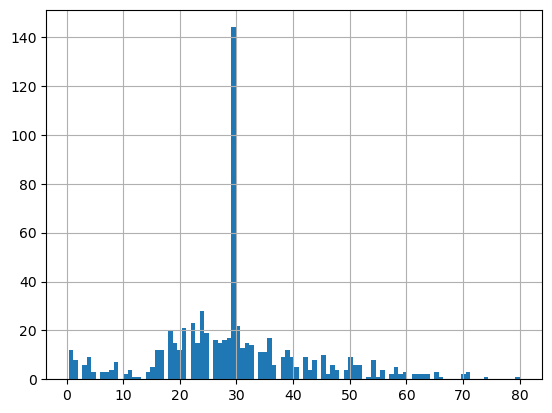

In [124]:
#Визуализируем в виде гистограммы столбец Возраст, много значений со средним возрастом
train_X.Age.hist(bins=100);


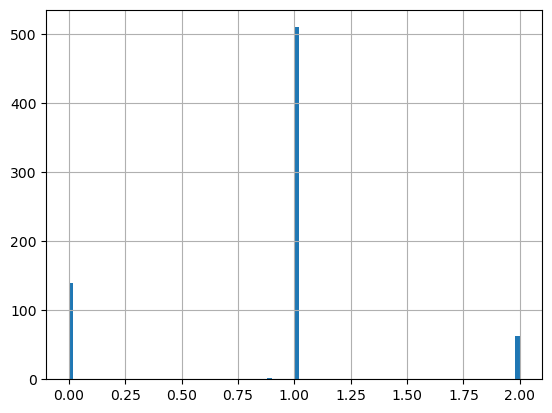

In [125]:
#Визуализируем в виде гистограммы столбец Порт, много пассажиров садились в порту S (пропусков было всего 2)
train_X.Embarked.hist(bins=100);

In [126]:
#Проверяем наличие пропусков в данных тестового множества
test_X.isna().sum()

Pclass       0
Age         33
SibSp        0
Parch        0
Fare         0
Sex          0
Embarked     0
dtype: int64

In [127]:
#заполнение пропусков средним значением возраста
test_X.Age.fillna(mean_age, inplace=True)

In [128]:
test_X.isna().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         0
Embarked    0
dtype: int64

#**ИССЛЕДОВАНИЕ КЛАССИФИКАТОРОВ**    

#Необходимо сравнить два классификатора по метрике точности на тестовом множестве (переменная acc_test). Вид классификаторов определяется согласно варианту.


**Классификатор 1 - ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ**   

In [34]:
clf1.get_params() #получить параметры классификатора логистическая регрессия

{'C': 0.49000000000000027,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [35]:
%%time
#Классификатор Логистическая регрессия (LogisticRegression), перебираем параметр С

results1 = pd.DataFrame()

C_value = 0
for C_v in range(1, 50, 1):
    C_value = C_value+0.01
    

    clf1 = LogisticRegression(C=C_value, random_state=seed,max_iter = 1000)
    clf1.fit(train_X, train_y)
    preds_train = clf1.predict(train_X) # предсказания для train_X 
    preds_test = clf1.predict(test_X) # предсказания для test_X

    results1_dict = {
                    'C_value':[C_value],  
                    'recall_train':[recall_score(train_y, preds_train)], 
                    'acc_train':[accuracy_score(train_y, preds_train)],
                    'prec_train':[precision_score(train_y, preds_train)],
                    'f1_train':[f1_score(train_y, preds_train)],
                    'recall_test':[recall_score(test_y, preds_test)],
                    'acc_test':[accuracy_score(test_y, preds_test)],
                    'prec_test':[precision_score(test_y, preds_test)],
                    'f1_test':[f1_score(test_y, preds_test)]
                   }
    
    results1_df = pd.DataFrame.from_dict(results1_dict)
    results1 = results1.append(results1_df)

results1.reset_index(inplace=True, drop=True)
   
   

 #Точность

CPU times: user 1.99 s, sys: 11.5 ms, total: 2 s
Wall time: 2 s


In [64]:
results1
#Результаты классификации методом логистической регрессии
# C_value - значение изменяемого параметра
# recall_train - точность на обучающем множестве
# acc_train - точность на обучающем множестве
#	prec_train - точность на обучающем множестве
#	f1_train - метрика F1 на обучающем множестве
#	recall_test	-  на тестовом множестве
# acc_test - точность на тестовом множестве
#	prec_test	 -  на тестовом множестве
# f1_test - метрика F1 на тестовом множестве


C_value  recall_train  acc_train  ...  acc_test  prec_test   f1_test
0      0.01      0.418773   0.744741  ...  0.702247   0.687500  0.453608
1      0.02      0.519856   0.778401  ...  0.724719   0.700000  0.533333
2      0.03      0.574007   0.793829  ...  0.741573   0.702128  0.589286
3      0.04      0.602888   0.795231  ...  0.741573   0.693878  0.596491
4      0.05      0.631769   0.805049  ...  0.747191   0.700000  0.608696
5      0.06      0.638989   0.800842  ...  0.752809   0.705882  0.620690
6      0.07      0.646209   0.798036  ...  0.752809   0.698113  0.627119
7      0.08      0.653430   0.799439  ...  0.758427   0.696429  0.644628
8      0.09      0.653430   0.798036  ...  0.758427   0.696429  0.644628
9      0.10      0.657040   0.799439  ...  0.758427   0.696429  0.644628
10     0.11      0.693141   0.806452  ...  0.775281   0.698413  0.687500
11     0.12      0.696751   0.806452  ...  0.769663   0.687500  0.682171
12     0.13      0.700361   0.806452  ...  0.764045   0.676923  0.676923
13     0.14      0.700361   0.805049  ...  0.764045   0.676923  0.676923
14     0.15      0.700361   0.805049  ...  0.764045   0.676923  0.676923
15     0.16      0.700361   0.805049  ...  0.764045   0.676923  0.676923
16     0.17      0.700361   0.805049  ...  0.764045   0.676923  0.676923
17     0.18      0.700361   0.805049  ...  0.764045   0.676923  0.676923
18     0.19      0.700361   0.805049  ...  0.764045   0.676923  0.676923
19     0.20      0.700361   0.805049  ...  0.764045   0.676923  0.676923
20     0.21      0.703971   0.803647  ...  0.764045   0.676923  0.676923
21     0.22      0.703971   0.802244  ...  0.764045   0.676923  0.676923
22     0.23      0.703971   0.798036  ...  0.764045   0.676923  0.676923
23     0.24      0.703971   0.798036  ...  0.764045   0.676923  0.676923
24     0.25      0.711191   0.800842  ...  0.764045   0.676923  0.676923
25     0.26      0.711191   0.800842  ...  0.764045   0.676923  0.676923
26     0.27      0.711191   0.800842  ...  0.764045   0.676923  0.676923
27     0.28      0.711191   0.800842  ...  0.764045   0.676923  0.676923
28     0.29      0.711191   0.800842  ...  0.764045   0.676923  0.676923
29     0.30      0.711191   0.800842  ...  0.764045   0.676923  0.676923
30     0.31      0.711191   0.800842  ...  0.764045   0.676923  0.676923
31     0.32      0.711191   0.799439  ...  0.764045   0.676923  0.676923
32     0.33      0.711191   0.799439  ...  0.764045   0.676923  0.676923
33     0.34      0.711191   0.799439  ...  0.764045   0.676923  0.676923
34     0.35      0.711191   0.799439  ...  0.758427   0.666667  0.671756
35     0.36      0.711191   0.799439  ...  0.758427   0.666667  0.671756
36     0.37      0.711191   0.799439  ...  0.758427   0.666667  0.671756
37     0.38      0.711191   0.799439  ...  0.758427   0.666667  0.671756
38     0.39      0.711191   0.799439  ...  0.758427   0.666667  0.671756
39     0.40      0.711191   0.799439  ...  0.758427   0.666667  0.671756
40     0.41      0.711191   0.798036  ...  0.758427   0.666667  0.671756
41     0.42      0.711191   0.798036  ...  0.758427   0.666667  0.671756
42     0.43      0.711191   0.798036  ...  0.758427   0.666667  0.671756
43     0.44      0.711191   0.798036  ...  0.758427   0.666667  0.671756
44     0.45      0.711191   0.798036  ...  0.758427   0.666667  0.671756
45     0.46      0.711191   0.798036  ...  0.758427   0.666667  0.671756
46     0.47      0.711191   0.798036  ...  0.758427   0.666667  0.671756
47     0.48      0.711191   0.796634  ...  0.758427   0.666667  0.671756
48     0.49      0.711191   0.796634  ...  0.758427   0.666667  0.671756

[49 rows x 9 columns]

In [39]:
#Важность признаков (столбцов), выученная логичестической регресией
clf1.coef_

array([[-0.98944157, -0.0418336 , -0.36571551, -0.04719004,  0.00349105,
         2.43396812, -0.14508319]])

In [41]:
#Вычисляем максимальную точность на тестовом множестве, аналогичноможно вычислить макисмальные точности по другим метрикам

results1[results1.acc_test == results1.acc_test.max()]

C_value  recall_train  acc_train  ...  acc_test  prec_test  f1_test
10     0.11      0.693141   0.806452  ...  0.775281   0.698413   0.6875

[1 rows x 9 columns]

**Классификатор 2 - ДЕРЕВО РЕШЕНИЙ**

In [42]:
%%time
#Эксперимент для дерева решений. Изменяем максимальную глубину дерева (max_depth) в диапазоне от 1 до 50 с шагом 1 и вычисляем максимальную точность на тестовом множестве.
results2 = pd.DataFrame()
for max_depth in range(1, 50, 1):
    clf2 = DecisionTreeClassifier(random_state=seed, max_depth=max_depth)
    clf2.fit(train_X, train_y)
    preds_train = clf2.predict(train_X)
    preds_test = clf2.predict(test_X)
    
    results2_dict = {
                    'max_depth':[max_depth],  
                    'recall_train':[recall_score(train_y, preds_train)], 
                    'acc_train':[accuracy_score(train_y, preds_train)],
                    'prec_train':[precision_score(train_y, preds_train)],
                    'f1_train':[f1_score(train_y, preds_train)],
                    'recall_test':[recall_score(test_y, preds_test)],
                    'acc_test':[accuracy_score(test_y, preds_test)],
                    'prec_test':[precision_score(test_y, preds_test)],
                    'f1_test':[f1_score(test_y, preds_test)]
                   }
    
    results2_df = pd.DataFrame.from_dict(results2_dict)
    results2 = results2.append(results2_df)

results2.reset_index(inplace=True, drop=True)

CPU times: user 741 ms, sys: 0 ns, total: 741 ms
Wall time: 744 ms


In [43]:
#Вычисляем максимальную точность на тестовом множестве, глубина дерева = 4

results2[results2.acc_test == results2.acc_test.max()]

max_depth  recall_train  acc_train  ...  acc_test  prec_test   f1_test
3          4      0.722022   0.830295  ...  0.837079   0.790323  0.771654

[1 rows x 9 columns]

In [44]:
results2_best = results2[results2.acc_test == results2.acc_test.max()]['max_depth'].values
print(results2_best)

[4]


In [46]:
results2 # Результаты классификации методом дерева решений

max_depth  recall_train  acc_train  ...  acc_test  prec_test   f1_test
0           1      0.675090   0.781206  ...  0.808989   0.754098  0.730159
1           2      0.523466   0.793829  ...  0.803371   0.941176  0.646465
2           3      0.707581   0.826087  ...  0.825843   0.783333  0.752000
3           4      0.722022   0.830295  ...  0.837079   0.790323  0.771654
4           5      0.743682   0.847125  ...  0.797753   0.716418  0.727273
5           6      0.729242   0.866760  ...  0.825843   0.793103  0.747967
6           7      0.833935   0.886396  ...  0.820225   0.739130  0.761194
7           8      0.848375   0.904628  ...  0.831461   0.761194  0.772727
8           9      0.880866   0.925666  ...  0.820225   0.739130  0.761194
9          10      0.895307   0.939691  ...  0.797753   0.704225  0.735294
10         11      0.927798   0.953717  ...  0.803371   0.720588  0.736842
11         12      0.931408   0.964937  ...  0.808989   0.718310  0.750000
12         13      0.942238   0.970547  ...  0.792135   0.694444  0.729927
13         14      0.942238   0.971950  ...  0.780899   0.685714  0.711111
14         15      0.956679   0.978962  ...  0.780899   0.680556  0.715328
15         16      0.963899   0.983170  ...  0.792135   0.689189  0.733813
16         17      0.963899   0.983170  ...  0.775281   0.676056  0.705882
17         18      0.963899   0.983170  ...  0.775281   0.676056  0.705882
18         19      0.971119   0.984572  ...  0.786517   0.690141  0.720588
19         20      0.967509   0.984572  ...  0.775281   0.676056  0.705882
20         21      0.971119   0.985975  ...  0.780899   0.680556  0.715328
21         22      0.971119   0.985975  ...  0.780899   0.680556  0.715328
22         23      0.971119   0.985975  ...  0.780899   0.680556  0.715328
23         24      0.971119   0.985975  ...  0.780899   0.680556  0.715328
24         25      0.971119   0.985975  ...  0.780899   0.680556  0.715328
25         26      0.971119   0.985975  ...  0.780899   0.680556  0.715328
26         27      0.971119   0.985975  ...  0.780899   0.680556  0.715328
27         28      0.971119   0.985975  ...  0.780899   0.680556  0.715328
28         29      0.971119   0.985975  ...  0.780899   0.680556  0.715328
29         30      0.971119   0.985975  ...  0.780899   0.680556  0.715328
30         31      0.971119   0.985975  ...  0.780899   0.680556  0.715328
31         32      0.971119   0.985975  ...  0.780899   0.680556  0.715328
32         33      0.971119   0.985975  ...  0.780899   0.680556  0.715328
33         34      0.971119   0.985975  ...  0.780899   0.680556  0.715328
34         35      0.971119   0.985975  ...  0.780899   0.680556  0.715328
35         36      0.971119   0.985975  ...  0.780899   0.680556  0.715328
36         37      0.971119   0.985975  ...  0.780899   0.680556  0.715328
37         38      0.971119   0.985975  ...  0.780899   0.680556  0.715328
38         39      0.971119   0.985975  ...  0.780899   0.680556  0.715328
39         40      0.971119   0.985975  ...  0.780899   0.680556  0.715328
40         41      0.971119   0.985975  ...  0.780899   0.680556  0.715328
41         42      0.971119   0.985975  ...  0.780899   0.680556  0.715328
42         43      0.971119   0.985975  ...  0.780899   0.680556  0.715328
43         44      0.971119   0.985975  ...  0.780899   0.680556  0.715328
44         45      0.971119   0.985975  ...  0.780899   0.680556  0.715328
45         46      0.971119   0.985975  ...  0.780899   0.680556  0.715328
46         47      0.971119   0.985975  ...  0.780899   0.680556  0.715328
47         48      0.971119   0.985975  ...  0.780899   0.680556  0.715328
48         49      0.971119   0.985975  ...  0.780899   0.680556  0.715328

[49 rows x 9 columns]

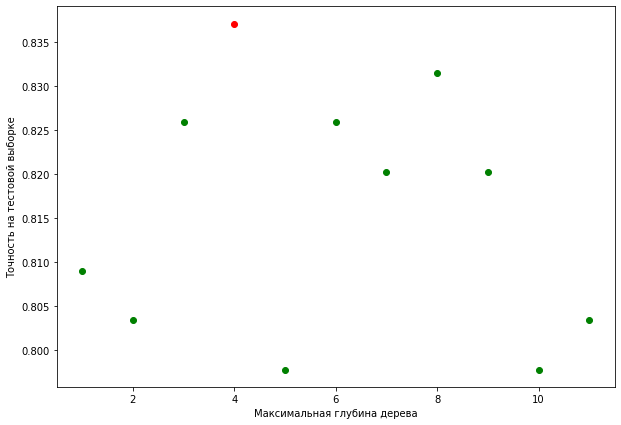

In [47]:
#График точности vs. максимальная глубина дерева решений с возможностью выделения наилучших значений
plt.figure(figsize=(10, 7))
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Точность на тестовой выборке')

results_not_best_depth = results2[results2['acc_test'] != results2['acc_test'].max()]['max_depth'].values
plt.scatter(
    x=results_not_best_depth[:10],
    y=results2[results2['acc_test'] != results2['acc_test'].max()]['acc_test'][:10],
    color="green",
    label='обычные'
)

results_best_depth = results2[results2['acc_test'] == results2['acc_test'].max()]['max_depth'].values
plt.scatter(
    x=results_best_depth,
    y=results2[results2['acc_test'] == results2['acc_test'].max()]['acc_test'],
    color="red",
    label='лучшие'
)

plt.show()

In [48]:
clf2.get_params() #получить параметры классификатора дерево решений

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 49,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

**Классификатор 3 - СЛУЧАЙНЫЙ ЛЕС**

In [129]:
clf3 = RandomForestClassifier()
clf3.get_params() #получить параметры классификатора Случайный лес

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [130]:
%%time
#Эксперимент для случайного леса

import warnings
warnings.filterwarnings('ignore')

results3 = pd.DataFrame()
for max_depth in range(1, 50, 1):
    clf3 = RandomForestClassifier(random_state=seed,max_depth=max_depth)
    clf3.fit(train_X, train_y)
    preds_train = clf3.predict(train_X)
    preds_test = clf3.predict(test_X)
    
    results3_dict = {
                    'max_depth':[max_depth],  
                    'recall_train':[recall_score(train_y, preds_train)], 
                    'acc_train':[accuracy_score(train_y, preds_train)],
                    'prec_train':[precision_score(train_y, preds_train)],
                    'f1_train':[f1_score(train_y, preds_train)],
                    'recall_test':[recall_score(test_y, preds_test)],
                    'acc_test':[accuracy_score(test_y, preds_test)],
                    'prec_test':[precision_score(test_y, preds_test)],
                    'f1_test':[f1_score(test_y, preds_test)]
                   }
    
    results3_df = pd.DataFrame.from_dict(results3_dict)
    results3 = results3.append(results3_df)

results3.reset_index(inplace=True, drop=True)

CPU times: total: 10.9 s
Wall time: 12.2 s


In [131]:
#Вычисляем максимальную точность на тестовом множестве,
# Глубина дерева  равна 7, 8, 9, точность выше чем у дерева решений, 

results3[results3.acc_test == results3.acc_test.max()]

max_depth  recall_train  acc_train  prec_train  f1_train  recall_test  \
6          7      0.805054   0.901823    0.933054  0.864341     0.753846   
7          8      0.844765   0.922861    0.951220  0.894837     0.784615   
8          9      0.870036   0.934081    0.956349  0.911153     0.753846   

   acc_test  prec_test   f1_test  
6  0.853933   0.830508  0.790323  
7  0.853933   0.809524  0.796875  
8  0.853933   0.830508  0.790323

In [132]:
results3_best = results3[results3.acc_test == results3.acc_test.max()]['max_depth'].values
print(results3_best)

[7 8 9]


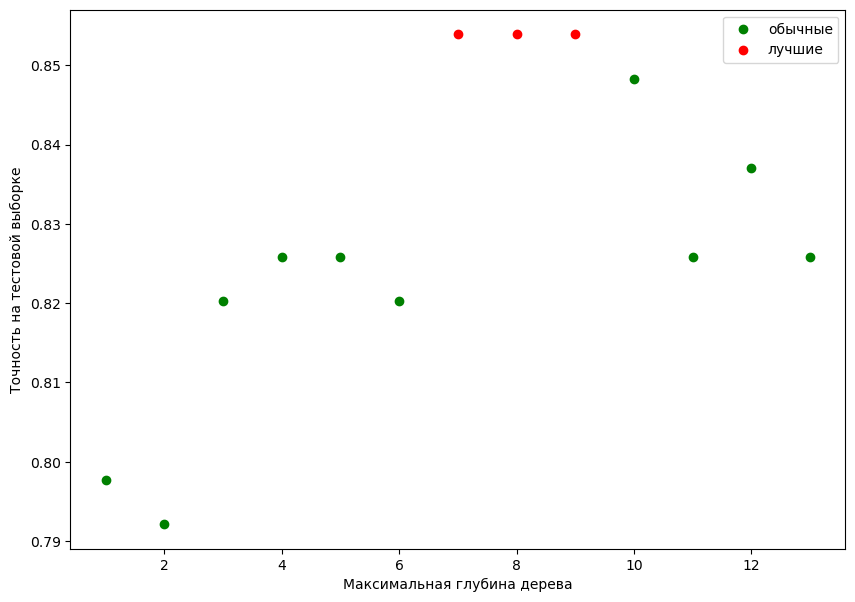

In [95]:
#График точности vs. максимальная глубина дерева решений в случайном лесе с возможностью выделения наилучших значений
plt.figure(figsize=(10, 7))
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Точность на тестовой выборке')

results_not_best_depth = results3[results3['acc_test'] != results3['acc_test'].max()]['max_depth'].values
plt.scatter(
    x=results_not_best_depth[:10],
    y=results3[results3['acc_test'] != results3['acc_test'].max()]['acc_test'][:10],
    color="green",
    label='обычные'
)

results_best_depth = results3[results3['acc_test'] == results3['acc_test'].max()]['max_depth'].values
plt.scatter(
    x=results_best_depth,
    y=results3[results3['acc_test'] == results3['acc_test'].max()]['acc_test'],
    color="red",
    label='лучшие'
)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

In [133]:
clf3.get_params() #получить параметры классификатора Случайный лес после эксперимента
          

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 49,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

**Классификатор 4 - ГРАДИЕНТНЫЙ БУСТИНГ**


In [134]:
clf4 = GradientBoostingClassifier()
clf4.get_params() #получить параметры классификатора Градиентный бустинг

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [135]:
%%time

import warnings
warnings.filterwarnings('ignore')

#Эксперимент для градиентного бустинга, снова перебираем глубину дерева...
results4 = pd.DataFrame()
for max_depth in range(1, 50, 1):
    clf4 = GradientBoostingClassifier(random_state=seed,max_depth=max_depth)
    clf4.fit(train_X, train_y)
    preds_train = clf4.predict(train_X)
    preds_test = clf4.predict(test_X)
    
    results4_dict = {
                    'max_depth':[max_depth],  
                    'recall_train':[recall_score(train_y, preds_train)], 
                    'acc_train':[accuracy_score(train_y, preds_train)],
                    'prec_train':[precision_score(train_y, preds_train)],
                    'f1_train':[f1_score(train_y, preds_train)],
                    'recall_test':[recall_score(test_y, preds_test)],
                    'acc_test':[accuracy_score(test_y, preds_test)],
                    'prec_test':[precision_score(test_y, preds_test)],
                    'f1_test':[f1_score(test_y, preds_test)]
                   }
    
    results4_df = pd.DataFrame.from_dict(results4_dict)
    results4 = results4.append(results4_df)

results4.reset_index(inplace=True, drop=True)

CPU times: total: 39.3 s
Wall time: 42.2 s


In [136]:
#Вычисляем максимальную точность на тестовом множестве,

# Глубина дерева  равна 4, 6, точность ниже, чем у случайного леса, но выше, чем у дерева решений
results4[results4.acc_test == results4.acc_test.max()]

max_depth  recall_train  acc_train  prec_train  f1_train  recall_test  \
3          4      0.873646   0.934081    0.952756  0.911488     0.769231   
5          6      0.949458   0.976157    0.988722  0.968692     0.784615   

   acc_test  prec_test   f1_test  
3  0.842697   0.793651  0.781250  
5  0.842697   0.784615  0.784615

In [137]:
results4_best = results4[results4.acc_test == results4.acc_test.max()]['max_depth'].values
print(results4_best)

[4 6]


In [140]:

plt.figure(figsize=(10, 7))
plt.xlabel('Максимальная глубина')
plt.ylabel('Точность на тестовой выборке')

results_not_best_depth = results3[results4['acc_test'] != results4['acc_test'].max()]['max_depth'].values
plt.scatter(
    x=results_not_best_depth[:10],
    y=results4[results4['acc_test'] != results4['acc_test'].max()]['acc_test'][:10],
    color="green",
    label='обычные'
)

results_best_depth = results4[results4['acc_test'] == results4['acc_test'].max()]['max_depth'].values
plt.scatter(
    x=results_best_depth,
    y=results4[results4['acc_test'] == results4['acc_test'].max()]['acc_test'],
    color="red",
    label='лучшие'
)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

In [141]:
clf4.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 49,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

**Классификатор 5 - НЕЙРОННЫЕ СЕТИ - многослойный персептрон**

In [62]:
clf5 = MLPClassifier()
clf5.get_params() #получить параметры классификатора MLP до эксперимента

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [63]:
%%time
#Эксперимент для многослойного персептрона, перебираем количество нейронов в скрытом слое (переменная hidden_size).
#Увеличение числа итераций приводит к переобучению и снижению точности
#Уменьшение числа итераций приводит к снижению точности
#Выполнено с предупреждениями


results5 = pd.DataFrame()
for hidden_size in range(1, 50):
    clf5 = MLPClassifier(hidden_layer_sizes=(hidden_size, ),max_iter = 200, random_state=seed)
    clf5.fit(train_X, train_y)
    preds_train = clf5.predict(train_X) # предсказания для train_X 
    preds_test = clf5.predict(test_X) # предсказания для test_X

    results5_dict = {
                    'hidden_size':[hidden_size],
                    'recall_train':[recall_score(train_y, preds_train)], 
                    'acc_train':[recall_score(train_y, preds_train)],
                    'prec_train':[precision_score(train_y, preds_train)],
                    'f1_train':[f1_score(train_y, preds_train)],
                    'recall_test':[recall_score(test_y, preds_test)],
                    'acc_test':[accuracy_score(test_y, preds_test)],
                    'prec_test':[precision_score(test_y, preds_test)],
                    'f1_test':[f1_score(test_y, preds_test)]
                   }
    
    results5_df = pd.DataFrame.from_dict(results5_dict)
    results5 = results5.append(results5_df)

results5.reset_index(inplace=True, drop=True)




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

CPU times: user 20.5 s, sys: 5.14 s, total: 25.6 s
Wall time: 20.1 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [65]:
results5

hidden_size  recall_train  acc_train  ...  acc_test  prec_test   f1_test
0             1      0.783394   0.783394  ...  0.595506   0.465347  0.566265
1             2      0.462094   0.462094  ...  0.696629   0.648649  0.470588
2             3      0.288809   0.288809  ...  0.696629   0.677419  0.437500
3             4      0.158845   0.158845  ...  0.612360   0.388889  0.168675
4             5      0.707581   0.707581  ...  0.764045   0.657534  0.695652
5             6      0.570397   0.570397  ...  0.752809   0.723404  0.607143
6             7      0.559567   0.559567  ...  0.735955   0.704545  0.568807
7             8      0.610108   0.610108  ...  0.764045   0.744681  0.625000
8             9      0.458484   0.458484  ...  0.747191   0.763158  0.563107
9            10      0.480144   0.480144  ...  0.702247   0.642857  0.504673
10           11      0.494585   0.494585  ...  0.730337   0.729730  0.529412
11           12      0.462094   0.462094  ...  0.702247   0.657895  0.485437
12           13      0.570397   0.570397  ...  0.730337   0.666667  0.586207
13           14      0.646209   0.646209  ...  0.797753   0.795918  0.684211
14           15      0.660650   0.660650  ...  0.719101   0.622951  0.603175
15           16      0.624549   0.624549  ...  0.808989   0.829787  0.696429
16           17      0.624549   0.624549  ...  0.775281   0.735849  0.661017
17           18      0.566787   0.566787  ...  0.769663   0.772727  0.623853
18           19      0.635379   0.635379  ...  0.764045   0.744681  0.625000
19           20      0.675090   0.675090  ...  0.752809   0.690909  0.633333
20           21      0.588448   0.588448  ...  0.764045   0.744681  0.625000
21           22      0.718412   0.718412  ...  0.780899   0.716667  0.688000
22           23      0.617329   0.617329  ...  0.764045   0.744681  0.625000
23           24      0.711191   0.711191  ...  0.808989   0.738462  0.738462
24           25      0.711191   0.711191  ...  0.814607   0.750000  0.744186
25           26      0.743682   0.743682  ...  0.808989   0.746032  0.734375
26           27      0.740072   0.740072  ...  0.803371   0.727273  0.732824
27           28      0.736462   0.736462  ...  0.803371   0.750000  0.720000
28           29      0.768953   0.768953  ...  0.764045   0.653333  0.700000
29           30      0.725632   0.725632  ...  0.803371   0.727273  0.732824
30           31      0.743682   0.743682  ...  0.814607   0.750000  0.744186
31           32      0.743682   0.743682  ...  0.831461   0.769231  0.769231
32           33      0.714801   0.714801  ...  0.825843   0.793103  0.747967
33           34      0.718412   0.718412  ...  0.797753   0.730159  0.718750
34           35      0.729242   0.729242  ...  0.814607   0.758065  0.740157
35           36      0.675090   0.675090  ...  0.769663   0.740000  0.643478
36           37      0.732852   0.732852  ...  0.786517   0.707692  0.707692
37           38      0.696751   0.696751  ...  0.814607   0.758065  0.740157
38           39      0.743682   0.743682  ...  0.825843   0.765625  0.759690
39           40      0.736462   0.736462  ...  0.786517   0.701493  0.712121
40           41      0.725632   0.725632  ...  0.820225   0.779661  0.741935
41           42      0.729242   0.729242  ...  0.808989   0.746032  0.734375
42           43      0.729242   0.729242  ...  0.820225   0.761905  0.750000
43           44      0.740072   0.740072  ...  0.758427   0.666667  0.671756
44           45      0.743682   0.743682  ...  0.808989   0.738462  0.738462
45           46      0.722022   0.722022  ...  0.797753   0.723077  0.723077
46           47      0.703971   0.703971  ...  0.803371   0.741935  0.724409
47           48      0.740072   0.740072  ...  0.797753   0.710145  0.731343
48           49      0.711191   0.711191  ...  0.808989   0.746032  0.734375

[49 rows x 9 columns]

In [66]:
#Вычисляем максимальную точность на тестовом множестве,
# Число  нейронов в скрытом слое равно 32, точность без добавления признака Embarked 0.831461

results5[results5.acc_test == results5.acc_test.max()]

hidden_size  recall_train  acc_train  ...  acc_test  prec_test   f1_test
31           32      0.743682   0.743682  ...  0.831461   0.769231  0.769231

[1 rows x 9 columns]

In [67]:
results5_best = results5[results5.acc_test == results5.acc_test.max()]['hidden_size'].values
print(results5_best)

[32]


In [68]:
clf5.get_params() #получить параметры классификатора MLP после эксперимента

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (49,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [69]:
# Выводы: упорядочиваем классификаторы по качеству предсказания.
# Метрика: точность на тестовой выборке (accuracy_score)

# 1. RandomForestClassifier 0.853933 
# 2. GradientBoostingClassifier 0.842697 
# 3. DecisionTreeClassifier 0.837079 
# 4. MLPClassifier 0.808989 
# 5. LogisticRegression 0.775281 
